In [8]:
""""
Figaro times collection times script. 
"""
import numpy as np
import pandas as pd
import os
import regex as re
from openpyxl import load_workbook, Workbook
from openpyxl.utils.cell import get_column_letter

path_src = "/local/scratch/Figaro/tests_path/figaro-code"
exp_names = ["svd_mkl_dc", "svd_figaro"]
exp_comp = {"svd_mkl_dc"}
exp_fig = "svd_figaro"
exp_paths = {"svd_mkl_dc": "/local/scratch/Figaro/tests_path/figaro-code/dumps/decomp_alg/svd/divide_and_conquer/sing_vals_100/col_major/s_only", "svd_figaro": "/local/scratch/Figaro/tests_path/figaro-code/dumps/figaro/svd/divide_and_conquer/sing_vals_100/s_onlyt/hread48"}
#db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
db_names = ["DBRetailer", "DBFavorita", "DBYelp"]
join_orders = {"DBRetailer": "LocationRoot", "DBFavorita": "StoresRoot", "DBYelp": "BusinessRoot"}
start_per = 10
end_per = 100
per_inc = 10

csv_name = "R.csv"
numeric_const_pattern = r"Relative error is: ([+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
rx = re.compile(numeric_const_pattern)

df_measurement_exps = {}

df_measurement = pd.DataFrame(columns=db_names)

for db_name in db_names:
    join_order = join_orders[db_name]

    db_name_per = "{}{}".format(db_name, "100")
    

    exp_path = exp_paths["svd_figaro"]
    path_csv = os.path.join(exp_path, db_name_per,
    join_order, csv_name)
    np_figaro = pd.read_csv(path_csv, header=None).astype(float).to_numpy()
    
    exp_path = exp_paths["svd_mkl_dc"]
    path_csv = os.path.join(exp_path, db_name_per,
    join_order, csv_name)
    np_mkl = pd.read_csv(path_csv, header=None).astype(float).to_numpy()
    
    for db_idx, percent in enumerate(range(start_per, end_per + 1, per_inc)):
        per_val = (int)(percent / 100.0 * np_figaro.shape[0])
        print(per_val)
        np_fig_per = np_figaro[:per_val]
        np_mkl_per = np_mkl[:per_val]
        np_diff = np_fig_per - np_mkl_per

        abs_err = np.linalg.norm(np_diff, ord='fro')
        abs_err_comp  = np.linalg.norm(np_mkl_per, ord='fro')
        if (percent == 100):
            print(np_mkl_per)
            print(np_figaro)
        relative_frob_norm = abs_err / abs_err_comp

        df_measurement.at[percent, db_name] = relative_frob_norm
df_measurement.to_csv("sing_values.csv", sep="\t")







4
[[1.35686847e+09]
 [1.75943577e+08]
 [1.55908290e+08]
 [1.19013434e+08]]
8
[[1.35686847e+09]
 [1.75943577e+08]
 [1.55908290e+08]
 [1.19013434e+08]
 [5.54811903e+07]
 [5.11199124e+07]
 [2.78698930e+07]
 [1.73623223e+07]]
12
[[1.35686847e+09]
 [1.75943577e+08]
 [1.55908290e+08]
 [1.19013434e+08]
 [5.54811903e+07]
 [5.11199124e+07]
 [2.78698930e+07]
 [1.73623223e+07]
 [1.02298919e+07]
 [6.17309299e+06]
 [4.15587890e+06]
 [4.07074236e+06]]
17
[[1.35686847e+09]
 [1.75943577e+08]
 [1.55908290e+08]
 [1.19013434e+08]
 [5.54811903e+07]
 [5.11199124e+07]
 [2.78698930e+07]
 [1.73623223e+07]
 [1.02298919e+07]
 [6.17309299e+06]
 [4.15587890e+06]
 [4.07074236e+06]
 [3.07368193e+06]
 [1.93459683e+06]
 [1.64106114e+06]
 [2.96934099e+05]
 [1.47459922e+05]]
21
[[1.35686847e+09]
 [1.75943577e+08]
 [1.55908290e+08]
 [1.19013434e+08]
 [5.54811903e+07]
 [5.11199124e+07]
 [2.78698930e+07]
 [1.73623223e+07]
 [1.02298919e+07]
 [6.17309299e+06]
 [4.15587890e+06]
 [4.07074236e+06]
 [3.07368193e+06]
 [1.9345968

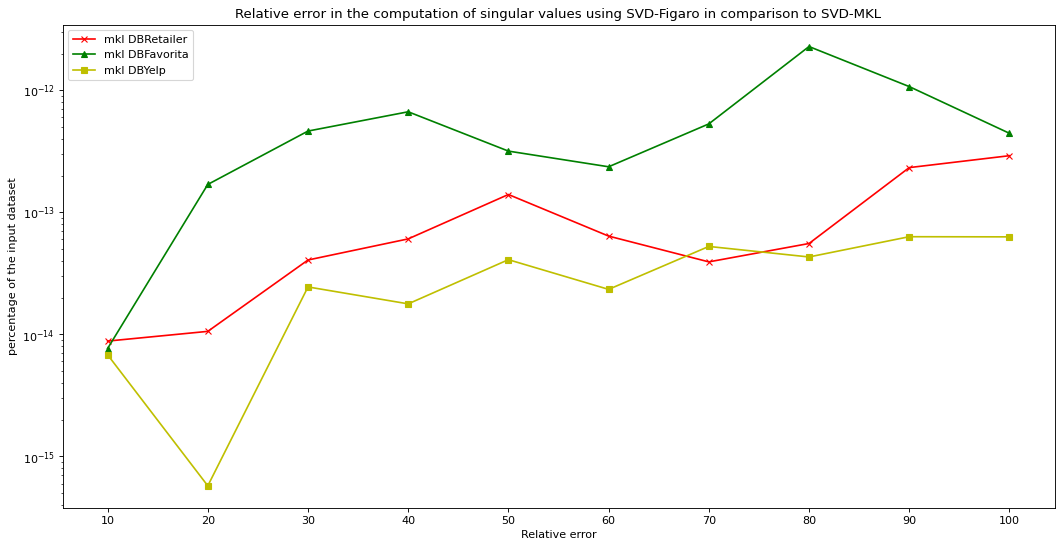

In [16]:
import matplotlib.pyplot as plt

plt.figure("name", figsize=(16, 8), dpi=80)
plt.xlabel("Percentage of the join size")
plt.ylabel("Relative error")

plt.title("Relative error in the computation of singular values using SVD-Figaro in comparison to SVD-MKL")

plt.yscale('log', base=10)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='x', nbins=10)
db_markers =  {"DBFavorita": "^", "DBYelp": "s", "DBRetailer": "x"}
db_colors = {"DBRetailer": "r", "DBFavorita": "g", "DBYelp": "y"}
comp_path = 
for exp_name in exp_names:
    df_measurement = df_measurement_exps[exp_name]
    for db_name in df_measurement:
        db_color = db_colors[db_name]
        db_marker = db_markers[db_name]
        plt.plot(df_measurement[db_name], "-" + db_color + db_marker, label="{} {}".format(exp_name, db_name))
plt.legend(loc="upper left")
plt.savefig('sing_val_accur.pdf')   # save the figure to file

plt.show()